In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns
import sklearn

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
path_to_file = '/content/drive/My Drive/album_ratings.csv'
source_df = pd.read_csv(path_to_file, engine='python')
source_df.dropna(inplace=True)
source_df.reset_index(inplace=True, drop=True)
del source_df["Artist"]
del source_df["Title"]
del source_df["Label"]

source_df.head(5)

,Release Month,Release Day,Release Year,Format,Genre,Metacritic Critic Score,Metacritic Reviews,Metacritic User Score,Metacritic User Reviews,AOTY Critic Score,AOTY Critic Reviews,AOTY User Score,AOTY User Reviews
0,March,3,2009,LP,Alt-Country,79.0,31.0,8.7,31.0,79,25,78,55
1,February,17,2009,LP,Country Rock,70.0,14.0,8.4,7.0,73,11,73,8
2,January,20,2009,LP,Psychedelic Pop,89.0,36.0,8.5,619.0,92,30,87,1335
3,January,27,2009,LP,Rock,72.0,29.0,7.9,101.0,70,23,66,38
4,January,20,2009,LP,Singer-Songwriter,79.0,29.0,8.7,47.0,74,24,78,44


In [ ]:
from sklearn.preprocessing import LabelEncoder
import sklearn
def code_categories(data: pd.DataFrame, method: str, columns: list) -> (pd.DataFrame, dict):
  data = data.dropna()
  data.reset_index(inplace=True, drop=True)
  d_data = data.copy()
  encoder_dict = dict()
  if method == 'label':
    for column in columns:
      le = sklearn.preprocessing.LabelEncoder()
      d_data[column] = le.fit_transform(d_data[column].values)
      mapping = dict(zip(le.classes_, range(len(le.classes_))))
      encoder_dict[column] = mapping
  elif method == 'onehot':
    d_data = pd.get_dummies(d_data, columns=columns)
  return d_data, encoder_dict

In [ ]:
#Chosen variables
#Release Month, Format, Metacritic Reviews, Metacritic User Score, AOTY Critic Reviews
# Target - AOTY User Score 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


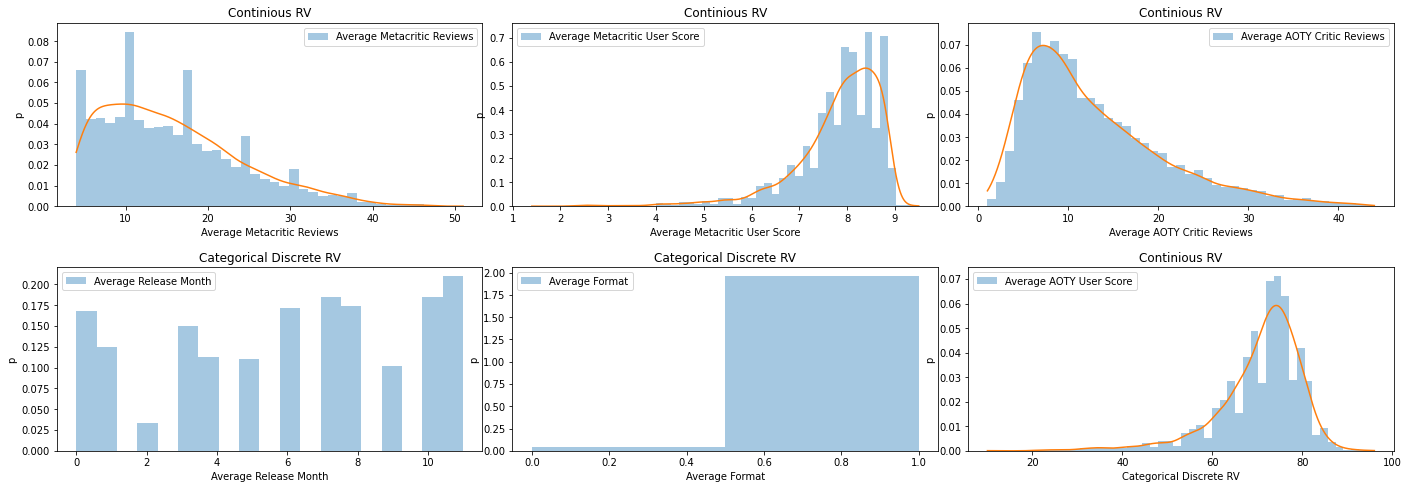

In [ ]:
#Step 1: Non-parametric estimation of PDF in form of histogram and using kernel density function for MRV (or probability law in case of discrete MRV)
plt.figure(figsize=(20, 7))
plt.subplot(2, 3, 1)

kernel = scipy.stats.gaussian_kde(source_df['Metacritic Reviews'])

min_amount, max_amount = source_df['Metacritic Reviews'].min(), source_df['Metacritic Reviews'].max()
x = np.linspace(min_amount, max_amount, len(source_df))
kde_values1 = kernel(x)

sns.distplot(source_df['Metacritic Reviews'], kde=False, norm_hist=True, label=f'Average Metacritic Reviews')
plt.title('Continious RV')

plt.plot(x, kde_values1)

plt.ylabel('p')
plt.xlabel('Average Metacritic Reviews')
plt.legend()
plt.tight_layout(pad=3.0)


plt.subplot(2, 3, 2)
kernel = scipy.stats.gaussian_kde(source_df['Metacritic User Score'])

min_amount, max_amount = source_df['Metacritic User Score'].min(), source_df['Metacritic User Score'].max()
x = np.linspace(min_amount, max_amount, len(source_df))
kde_values2 = kernel(x)

sns.distplot(source_df['Metacritic User Score'], kde=False, norm_hist=True, label=f'Average Metacritic User Score')
plt.title('Continious RV')
plt.plot(x, kde_values2)
plt.ylabel('p')
plt.xlabel('Average Metacritic User Score')
plt.legend()



plt.subplot(2, 3, 3)
kernel = scipy.stats.gaussian_kde(source_df['AOTY Critic Reviews'])

min_amount, max_amount = source_df['AOTY Critic Reviews'].min(), source_df['AOTY Critic Reviews'].max()
x = np.linspace(min_amount, max_amount, len(source_df))
kde_values2 = kernel(x)

sns.distplot(source_df['AOTY Critic Reviews'], kde=False, norm_hist=True, label=f'Average AOTY Critic Reviews')
plt.title('Continious RV')
plt.plot(x, kde_values2)
plt.ylabel('p')
plt.xlabel('Average AOTY Critic Reviews')
plt.legend()

print('\n')
print('\n')

plt.subplot(2, 3, 4)
cat_param = ['Release Month']
X, code_dict = code_categories(source_df, 'label', cat_param)
kernel = scipy.stats.gaussian_kde(X['Release Month'])

min_amount, max_amount = X['Release Month'].min(), X['Release Month'].max()
x = np.linspace(min_amount, max_amount, len(X))
kde_values3 = kernel(x)

sns.distplot(X['Release Month'], kde=False, norm_hist=True, label=f'Average Release Month')
# plt.plot(x, kde_values3)
plt.title('Categorical Discrete RV')
plt.ylabel('p')
plt.xlabel('Average Release Month')
plt.legend()



plt.subplot(2, 3, 5)
cat_param = ['Format']
X, code_dict = code_categories(source_df, 'label', cat_param)
kernel = scipy.stats.gaussian_kde(X['Format'])

min_amount, max_amount = X['Format'].min(), X['Format'].max()
x = np.linspace(min_amount, max_amount, len(X))
kde_values3 = kernel(x)

sns.distplot(X['Format'], kde=False, norm_hist=True, label=f'Average Format',bins =2 )
# plt.plot(x, kde_values3)
plt.title('Categorical Discrete RV')
plt.ylabel('p')
plt.xlabel('Average Format')
plt.legend()


plt.subplot(2, 3, 6)
kernel = scipy.stats.gaussian_kde(source_df['AOTY User Score'])

min_amount, max_amount = source_df['AOTY User Score'].min(), source_df['AOTY User Score'].max()
x = np.linspace(min_amount, max_amount, len(source_df))
kde_values2 = kernel(x)

sns.distplot(source_df['AOTY User Score'], kde=False, norm_hist=True, label=f'Average AOTY User Score')
plt.title('Continious RV')
plt.plot(x, kde_values2)
plt.ylabel('p')
plt.xlabel('Categorical Discrete RV')
plt.legend()

plt.show()

In [ ]:
#Step 2: An estimation of multivariate mathematical expectation and variance.

In [ ]:
X = source_df.loc[:, ['Release Month', 'Format', 'Metacritic Reviews', 'Metacritic User Score', 'AOTY Critic Reviews']]
cat_param = ['Release Month']
X, code_dict = code_categories(X, 'label', cat_param)
cat_param = ['Format']
X, code_dict = code_categories(X, 'label', cat_param)

Mathematical expectation

In [ ]:
X.apply(np.mean)

Release Month             6.044321
Format                    0.980484
Metacritic Reviews       15.635105
Metacritic User Score     7.815815
AOTY Critic Reviews      12.742886
dtype: float64

Mathematical variance

In [ ]:
X.apply(np.var)

Release Month            12.524855
Format                    0.019136
Metacritic Reviews       69.894552
Metacritic User Score     0.861951
AOTY Critic Reviews      60.190251
dtype: float64

Conditional statistics for AOTY User Score >= 80

In [ ]:
class80_ = source_df[source_df['AOTY User Score'] >= 80].loc[:, ['Release Month', 'Format', 'Metacritic Reviews', 'Metacritic User Score', 'AOTY Critic Reviews']]
cat_param = ['Release Month']
class80_, code_dict = code_categories(class80_, 'label', cat_param)
cat_param = ['Format']
class80_, code_dict = code_categories(class80_, 'label', cat_param)

In [ ]:
class80_.apply(np.mean)

Release Month             6.285263
Format                    0.978947
Metacritic Reviews       19.876842
Metacritic User Score     8.437789
AOTY Critic Reviews      14.588421
dtype: float64

In [ ]:
class80_.apply(np.var)

Release Month            12.338625
Format                    0.020609
Metacritic Reviews       98.867990
Metacritic User Score     0.248582
AOTY Critic Reviews      96.543234
dtype: float64

Conditional statistics for AOTY User Score >= 50 and AOTY User Score < 80

In [ ]:
class50_ = source_df[(source_df['AOTY User Score'] >= 50) & (source_df['AOTY User Score'] < 80)].loc[:, ['Release Month', 'Format', 'Metacritic Reviews', 'Metacritic User Score', 'AOTY Critic Reviews']]
cat_param = ['Release Month']
class50_, code_dict = code_categories(class50_, 'label', cat_param)
cat_param = ['Format']
class50_, code_dict = code_categories(class50_, 'label', cat_param)

In [ ]:
class50_.apply(np.mean)

Release Month             6.005380
Format                    0.980421
Metacritic Reviews       15.235092
Metacritic User Score     7.820565
AOTY Critic Reviews      12.650276
dtype: float64

In [ ]:
class50_.apply(np.var)

Release Month            12.597191
Format                    0.019195
Metacritic Reviews       63.762846
Metacritic User Score     0.622910
AOTY Critic Reviews      55.382700
dtype: float64

Conditional statistics for AOTY User Score < 50

In [ ]:
class0_ = source_df[source_df['AOTY User Score'] < 50].loc[:, ['Release Month', 'Format', 'Metacritic Reviews', 'Metacritic User Score', 'AOTY Critic Reviews']]
cat_param = ['Release Month']
class0_, code_dict = code_categories(class50_, 'label', cat_param)
cat_param = ['Format']
class0_, code_dict = code_categories(class50_, 'label', cat_param)

In [ ]:
class0_.apply(np.mean)

Release Month             6.005380
Format                    0.980421
Metacritic Reviews       15.235092
Metacritic User Score     7.820565
AOTY Critic Reviews      12.650276
dtype: float64

In [ ]:
class0_.apply(np.var)

Release Month            12.597191
Format                    0.019195
Metacritic Reviews       63.762846
Metacritic User Score     0.622910
AOTY Critic Reviews      55.382700
dtype: float64

Step 4. You need to make an estimation of pair correlation coefficients, confidence intervals for them and significance levels.

In [ ]:
# Confidence interval for the correlation coefficient
from scipy import stats
X_cont = source_df.loc[:, ['Metacritic Reviews', 'Metacritic User Score', 'AOTY Critic Reviews','AOTY User Score']]
for i in range(len(X_cont.columns)):
  for j in range(i):
    x = X_cont[X_cont.columns[i]].apply(lambda x: float(x))
    y = X_cont[X_cont.columns[j]].apply(lambda x: float(x))
    r, p = stats.pearsonr(x,y)
    r_z = np.arctanh(r) # matches Fisher transform
    # Corresponding standard deviation
    se = 1/np.sqrt(x.size-3)
    alpha = 0.05
    z = stats.norm.ppf(1-alpha/2)
    lo_z, hi_z = r_z-z*se, r_z+z*se
    print('Correlation coefficient for ',X_cont.columns[i],' and ',X_cont.columns[j],' = ', r)
    print('Confidence interval for the correlation coefficient ', lo_z, hi_z)
    print('Significance level is ', alpha)
    print('\n')

Correlation coefficient for  Metacritic User Score  and  Metacritic Reviews  =  0.1777558361320512
Confidence interval for the correlation coefficient  0.15766725491298095 0.20166143069289572
Significance level is  0.05


Correlation coefficient for  AOTY Critic Reviews  and  Metacritic Reviews  =  0.8086347383718305
Confidence interval for the correlation coefficient  1.1010747046591314 1.145068880439046
Significance level is  0.05


Correlation coefficient for  AOTY Critic Reviews  and  Metacritic User Score  =  0.09456150275092924
Confidence interval for the correlation coefficient  0.07284778922864656 0.1168419650085613
Significance level is  0.05


Correlation coefficient for  AOTY User Score  and  Metacritic Reviews  =  0.24918539206441365
Confidence interval for the correlation coefficient  0.2325469973555899 0.27654117313550464
Significance level is  0.05


Correlation coefficient for  AOTY User Score  and  Metacritic User Score  =  0.5862552753391421
Confidence interval for th

Kendall correlation coefficient for discrete variables

In [ ]:
X_k = X.loc[:, ['Release Month', 'Format']]
x1 = X_k['Release Month']
x2 = X_k['Format']
tau, p_value = stats.kendalltau(x1, x2)

In [ ]:
print('The tau statistic:', tau)
print('Significance level is ',p_value)

The tau statistic: -0.002116865277602958
Significance level is  0.8249972454928313


Step 5. Choose a task formulation for regression. Estimate multivariate correlation (target - predictors).

Predictors: Release Month, Format, Metacritic Reviews, Metacritic User Score, AOTY Critic Reviews \
Target: AOTY User Score 

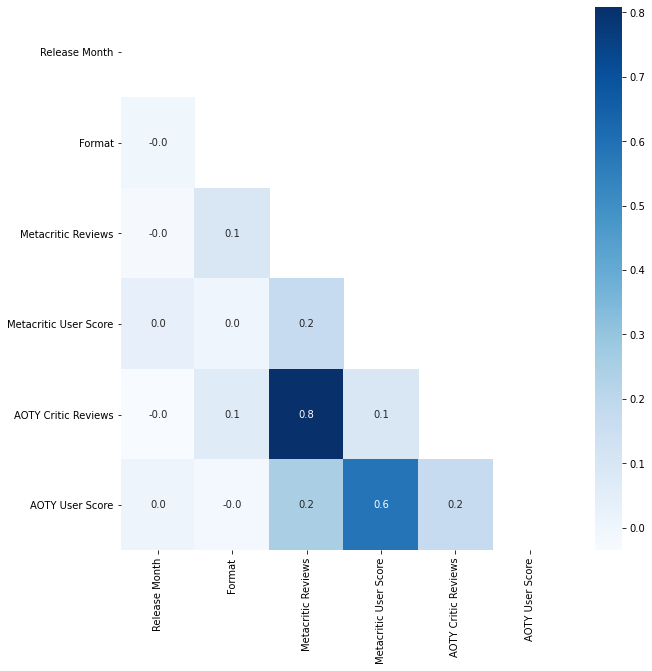

In [ ]:
# Building a correlation matrix of features
X = source_df.loc[:, ['Release Month', 'Format', 'Metacritic Reviews', 'Metacritic User Score', 'AOTY Critic Reviews','AOTY User Score']]
cat_param = ['Release Month']
X, code_dict = code_categories(X, 'label', cat_param)
cat_param = ['Format']
X, code_dict = code_categories(X, 'label', cat_param)

dataset = X
corr = dataset.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


f, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(corr, mask = mask, annot=True, fmt= '.1f', ax = ax, cmap = 'Blues')

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
import math
import pylab 
from sklearn.linear_model import  LassoLarsIC

In [ ]:
x = X.loc[:,['Release Month', 'Format', 'Metacritic Reviews', 'Metacritic User Score', 'AOTY Critic Reviews']]
y = X.loc[:,'AOTY User Score']

In [ ]:
# Division into training and test samples
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
xx = []
for i in range(len(y_test)):
    xx.append(i)

In [ ]:
# Create a linear regression model
reg = LinearRegression(normalize=True)
# Train a linear regression model
reg.fit(X_train, y_train)
# Forecast on a test sample
y_pred = reg.predict(X_test)
params = np.append(reg.intercept_,reg.coef_)

In [ ]:
# Calculate regression metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print('Mean absolute error = ', mae)
print('Mean squared error = ', mse)

Mean absolute error =  5.548890140286154
Mean squared error =  58.26223286520182


In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, y_pred)
print('Mean absolute percentage error = ', mape)

Mean absolute percentage error =  8.94354105180049


In [ ]:
# Lasso regularization
clf = linear_model.Lasso(alpha=0.05)
clf.fit(X_train, y_train)
print(clf.coef_)

[-0.         -0.          0.15734691  5.58223095  0.01520861]


In [ ]:
model_aic = LassoLarsIC(criterion='aic')
model_aic.fit(X_train, y_train)
alpha_aic_ = model_aic.coef_
alpha_aic_

array([ 0.        , -1.78444789,  0.15824528,  5.62658162,  0.01528555])

In [ ]:
y_pred_lasso = clf.predict(X_test)
y_pred_lasso_aic = model_aic.predict(X_test)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mae_lasso_aic = mean_absolute_error(y_test, y_pred_lasso_aic)
print('Mean absolute error with lasso = ', mae_lasso)
print('Mean squared error with lasso = ', mse_lasso)
print('Mean absolute error with aic lasso = ', mae_lasso_aic)

Mean absolute error with lasso =  5.560299389908916
Mean squared error with lasso =  58.43275013092204
Mean absolute error with aic lasso =  5.549690757918829


Text(0, 0.5, 'Age')

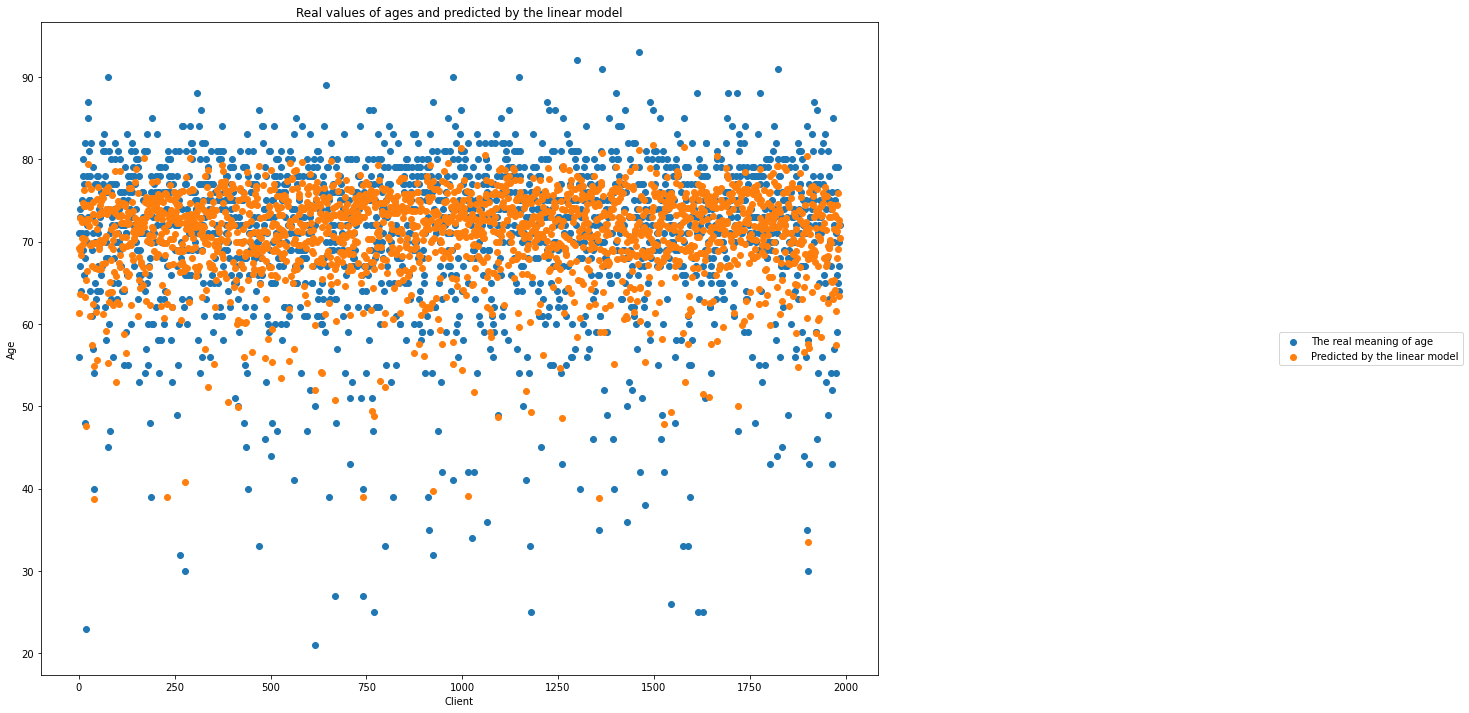

In [ ]:
#graph of real and predicted values
plt.figure(figsize=(15, 12))
plt.scatter(xx, y_test, label = u'The real meaning of age')
plt.scatter(xx, y_pred, label = u'Predicted by the linear model')
plt.title(u'Real values of ages and predicted by the linear model')
plt.legend(loc="center right",borderaxespad=0.1, bbox_to_anchor=(1.7, 0.5))
plt.xlabel(u'Client')
plt.ylabel(u'Age')

As we can see, mean squared error in case of regularization (58.50) is almost equal to the case without it (58.26). Range of alphas regularization parameters was tested and none of them lead to lower mean squared error.

As we can see from heat map Metacritic Reviews and AOTY Critic Reviews showed the correlation equal to 0.8. This is multicollinearity. For better results choose just one of these 2 predictors: Metacritic Reviews. And remodel the regression.

In [ ]:
x = X.loc[:,['Release Month', 'Format', 'Metacritic Reviews', 'Metacritic User Score']]
y = X.loc[:,'AOTY User Score']

In [ ]:
# Division into training and test samples
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
xx = []
for i in range(len(y_test)):
    xx.append(i)

In [ ]:
# Create a linear regression model
reg = LinearRegression(normalize=True)
# Train a linear regression model
reg.fit(X_train, y_train)
# Forecast on a test sample
y_pred = reg.predict(X_test)
params = np.append(reg.intercept_,reg.coef_)

In [ ]:
# Calculate regression metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print('Mean absolute error = ', mae)
print('Mean squared error = ', mse)

Mean absolute error =  5.548856729040453
Mean squared error =  58.264387656275346


In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, y_pred)
print('Mean absolute percentage error = ', mape)

Mean absolute percentage error =  8.945356044617533


In [ ]:
# Lasso regularization
clf = linear_model.Lasso(alpha=0.05)
clf.fit(X_train, y_train)
print(clf.coef_)

[-0.         -0.          0.16856392  5.57600565]


In [ ]:
model_aic = LassoLarsIC(criterion='aic')
model_aic.fit(X_train, y_train)
alpha_aic_ = model_aic.coef_
alpha_aic_

array([ 0.        , -1.78799113,  0.16974283,  5.61899811])

In [ ]:
y_pred_lasso = clf.predict(X_test)
y_pred_lasso_aic = model_aic.predict(X_test)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mae_lasso_aic = mean_absolute_error(y_test, y_pred_lasso_aic)
print('Mean absolute error with lasso = ', mae_lasso)
print('Mean squared error with lasso = ', mse_lasso)
print('Mean absolute error with aic lasso = ', mae_lasso_aic)

Mean absolute error with lasso =  5.560427459137334
Mean squared error with lasso =  58.43687176318524
Mean absolute error with aic lasso =  5.549802130920107


Text(0, 0.5, 'Age')

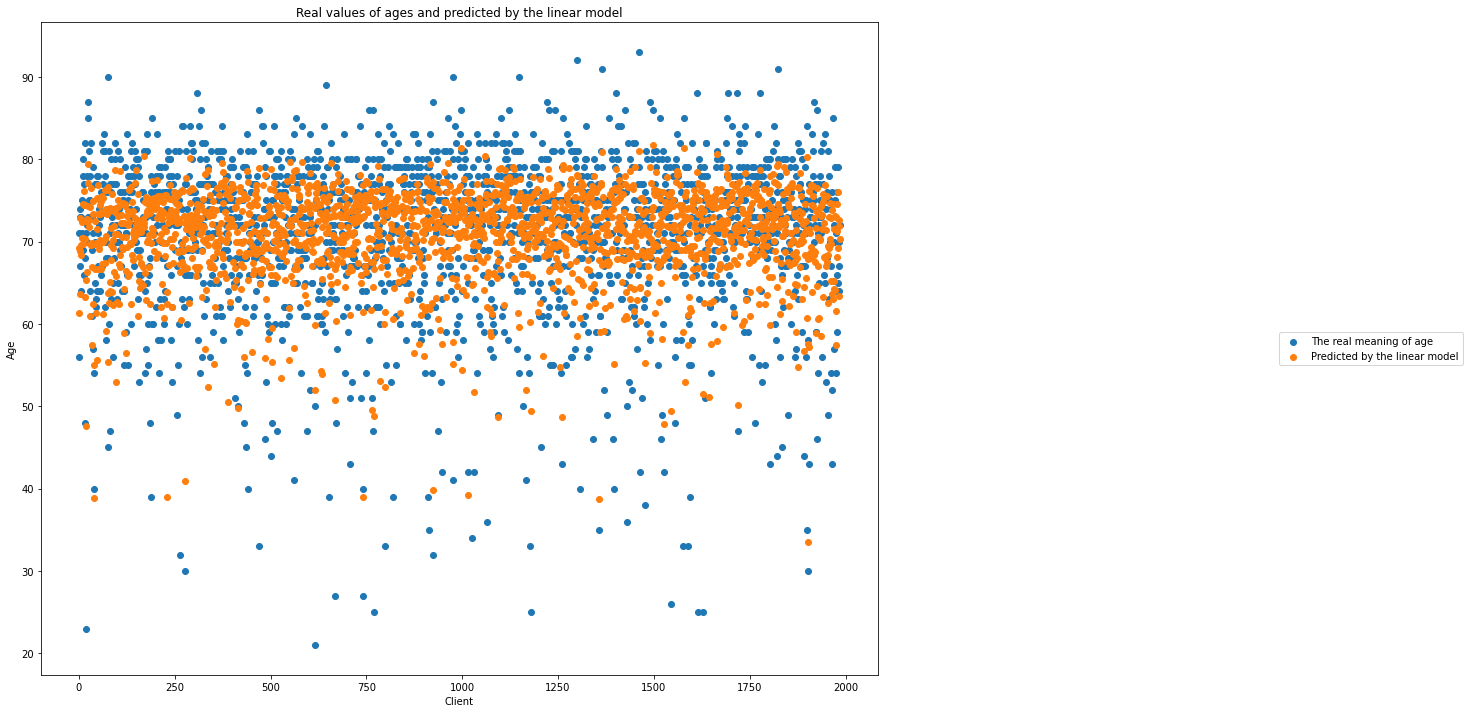

In [ ]:
#graph of real and predicted values
plt.figure(figsize=(15, 12))
plt.scatter(xx, y_test, label = u'The real meaning of age')
plt.scatter(xx, y_pred, label = u'Predicted by the linear model')
plt.title(u'Real values of ages and predicted by the linear model')
plt.legend(loc="center right",borderaxespad=0.1, bbox_to_anchor=(1.7, 0.5))
plt.xlabel(u'Client')
plt.ylabel(u'Age')

Mean squared error in second model without multicollinearity (58.264) is almost equal to the mean squared error in first model (58.262). So in this case dropping out one predictor that correlates with another don't lead to the decrease of model errors.

In [ ]:
#Step 7. Analyze the quality of regression model (distribution of residuals, determination

In [ ]:
sklearn.metrics.r2_score(y_test, y_pred)

0.3688566195030817

In [ ]:
#R^2 is less than 50% that says that the quality of builded regression model is very low. The predictors don't 
#explain the change of the target variable.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


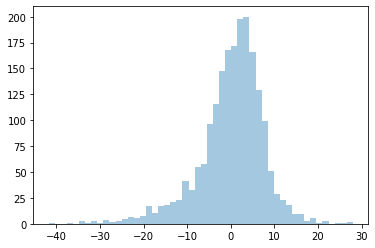

In [ ]:
# Plotting the distribution of residuals
y_pred_all = np.array(reg.predict(X_test))
y1 = np.array(y_test)
y2 = np.array(y_pred_all)
y_diff = y1 - y2
sns.distplot(y_diff, kde=False)

In [ ]:
#Histogram shows that distribution of residuals looks like normal
#distribution so the regression model shows quality results in terms of residuals.